## Topic Labelling
##### The model chosen: Mallet LDA with 6 topics and alpha = 1.5 and batchsize=1
##### Each topic is examined to put a human-interpretable label.

Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.option_context('display.max_colwidth', 500);
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image

Import mallet model

In [2]:
df = pd.read_pickle('lda_mallet_model/mallet_lda_df.pkl')
netflix = pd.read_pickle('raw_data/netflix.pkl')
df = pd.concat([df.loc[:, ['Dominant_Topic', 'Perc_Contribution', 'Keywords']].reset_index(drop=True),
                netflix.loc[:, ['star_rating', 'helpful_votes', 'total_votes', 'review']].reset_index(drop=True)], axis=1)
data_lemmatized = pd.read_pickle('preprocessed_data/data_lemmatized.pkl')
topic_ids = df.loc[:, 'Dominant_Topic'].values

In [3]:
def one_string(texts, boolean_mask):
    thing = ' '.join([' '.join(item) for item in [row for row, boolean in zip(texts, boolean_mask) if boolean]])
    return re.sub(r'[ ]{2,}', ' ', thing)

In [4]:
def create_wordcloud(img_directory, id, contour_width=3, contour_color='green', background_color="white"):
    mask = np.array(Image.open(img_directory))
    stopwords = set(STOPWORDS)
    stopwords |= set(["movie", "thing", "love"])
    wc = WordCloud(background_color=background_color, max_words=10, mask=mask, stopwords=stopwords,
                   max_font_size=100, random_state=40, contour_width=contour_width, contour_color=contour_color)
    wc.generate(one_string(data_lemmatized, topic_ids == id))
    return wc

In [5]:
# print(matplotlib.colors.cnames["green"], matplotlib.colors.cnames["lightpink"], matplotlib.colors.cnames["gray"],
#       matplotlib.colors.cnames["dodgerblue"], matplotlib.colors.cnames["darkred"], matplotlib.colors.cnames["goldenrod"])

#008000 #FFB6C1 #808080 #1E90FF #8B0000 #DAA520


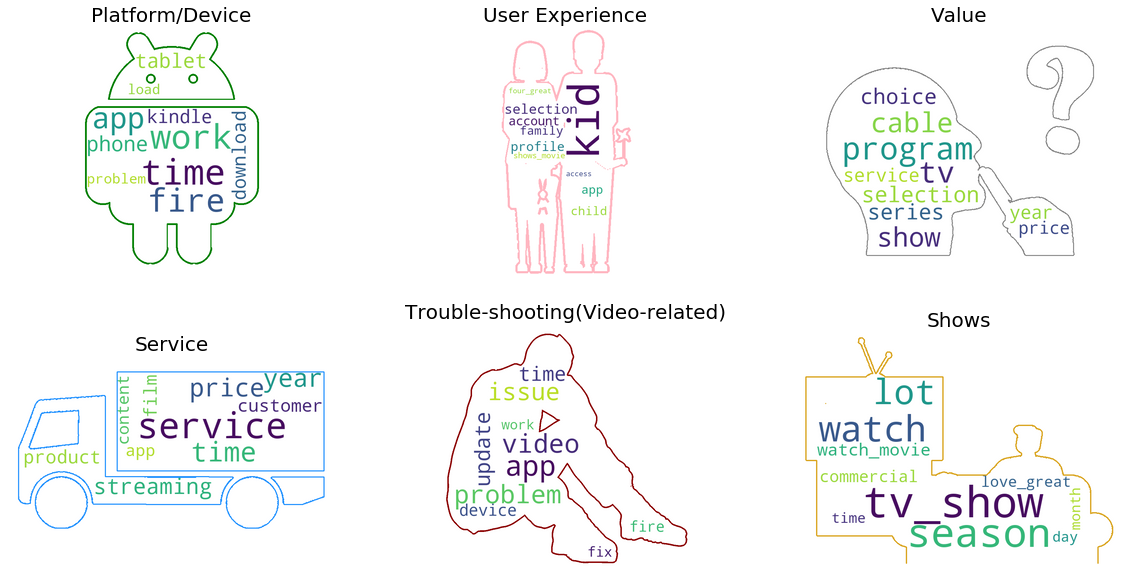

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
ax[0,0].set_title('Platform/Device', fontsize=20); ax[0,0].imshow(create_wordcloud('images/android.png', 0), interpolation='spline36'); ax[0,0].axis("off")
ax[0,1].set_title('User Experience', fontsize=20); ax[0,1].imshow(create_wordcloud('images/family.png', 1,contour_color='lightpink'), interpolation='spline36'); ax[0,1].axis("off")
ax[0,2].set_title('Value', fontsize=20); ax[0,2].imshow(create_wordcloud('images/think.png', 2,contour_color='gray'), interpolation='spline36'); ax[0,2].axis("off")
ax[1,0].set_title('Service', fontsize=20); ax[1,0].imshow(create_wordcloud('images/service.png', 3,contour_color='dodgerblue'), interpolation='spline36'); ax[1,0].axis("off")
ax[1,1].set_title('Trouble-shooting(Video-related)', fontsize=20); ax[1,1].imshow(create_wordcloud('images/problem.png', 4,contour_color='darkred'), interpolation='spline36'); ax[1,1].axis("off")
ax[1,2].set_title('Shows', fontsize=20); ax[1,2].imshow(create_wordcloud('images/show.png', 5,contour_color='goldenrod'), interpolation='spline36'); ax[1,2].axis("off");

plt.savefig('images/{}'.format("wordcloud"), dpi=200, transparent=True, bbox_inches = "tight")

### Topic 0. Platform/Device

In [7]:
df.loc[df.Dominant_Topic == 0.0, 'Keywords'].head(1).values

array(['time, work, app, fire, love, phone, movie, tablet, download, kindle'],
      dtype=object)

In [8]:
tmp = df.loc[df.Dominant_Topic == 0.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 0 reviews are mostly(71%) highly rated as 5 and not that many helpful votes(89% have no helpful votes)

In [9]:
sum(tmp.loc[:, 'star_rating'] == 5.0) / len(tmp)

0.7064220183486238

In [10]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.895859
1    0.065956
2    0.011158
Name: helpful_votes, dtype: float64

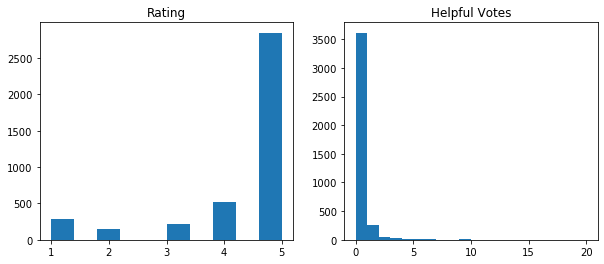

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [12]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
3633,0.893600,4,2,3,"very good I like this app overall but I don't like that their can only be two people on it at a time. It would be better if you could use it without Internet. Sometimes it takes a long to to load or buffer an it makes you shows blurry. There is not as much movies and shows that some other thing like netflix have. Netflix is very good app for sitting down with you family and watching a movie or being alone and watching a show or movie on the couch or even in your bed. Netflix has a lot of great movies and shows to watch. If you find one that you like but you don't want to watch it the you can add it to your list. Overall netflix is really great app and if you like to watch movies then I would get this app for sure. I like the fact that it is free so for sure get it.I guess you can pay more money monthly for netflix to work on more than two devices at a time. Overall other than the long load times that we encounter once in a great while we will continue to be a netflix customer. We have been now for 4 years and it runs great on out kindles,laptops,and I pods. You can also use it where they have free WiFi like mcdonalds."
5050,0.867900,1,1,2,"I have to restart Kindle Fire to get it to work half the time Netflix freezes up on my Kindle Fire literally every other time I use it. I have to restart the Kindle Fire to get Netflix to work again. Specifically it freezes when I select a movie, any movie, to watch. Once the movie starts playing, it works fine."
5696,0.866800,2,0,0,It stops working after 5 minutes it stops working when ever I start watching a show it works fine but then I try to keep watching it and it freezes and dosent let me finish the show..... super annoying.
831,0.866700,2,0,1,ap doesnt work very well on kindle fire netflix works great on anderoid phones & every other device we use it on but not kindle fire. it freezes cant change shows have to turn off kindle go into some other app a few times cant scroll down to show you are on. I hope it gets better
330,0.865200,5,1,1,"Netflix rocks I can find what I want easier than on the tv and it doesn't interrupt anyone else who is watching it. When I have found what I want to watch, Netflix has a watchlist to add them on- so they are right there, easy to find. I hardly ever watch the regular tv at all any more. Seriously.....it's a MUST HAVE!!!!"


### Topic 1. User Experience

In [13]:
df.loc[df.Dominant_Topic == 1.0, 'Keywords'].iloc[0]

'movie, kid, profile, account, selection, family, child, shows_movie, site, watch'

In [14]:
tmp = df.loc[df.Dominant_Topic == 1.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 1 reviews are 61% rated as 5 and not that many helpful votes(82% have no helpful votes)

In [15]:
sum(tmp.loc[:, 'star_rating'] == 5.0) / len(tmp)

0.6024615384615385

In [16]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.812923
1    0.124923
2    0.017846
Name: helpful_votes, dtype: float64

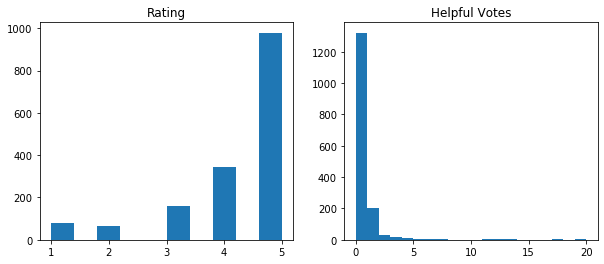

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [18]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
10412,0.923200,4,10,12,"NETFLIX is great! I really enjoy using NETFLIX. It is user-friendly, very convenient and inexpensive.The one thing I would change about NETFLIX is the content availability, for example, my children, ages 7 and 8 love to watch movies on NETFLIX and they do have a great selection of children/family content, but at the same time, my kids have access to R-rated, gay-lesbian, horror, etc. I wish they had a setting which I could prevent them from viewing those genres. For now, I just closely monitor them, as any good parent should do anyway!"
2752,0.913300,3,0,1,Needs more perantal control so parents can restrict what content ... Needs more perantal control so parents can restrict what content individual users are able to view. Adult user accounts should be password protected. As it stands now kids can select an adult account or a childs account with no restrictions.
8637,0.906500,3,0,1,users Good app except you can't switch users. I set up different users on my account via the computer. When I go on the app it defaults to my user preferences because I am the primary account holder. When my mother watches her shows on her iPad it automatically assumes its me because there is no option to switch users on the app. I wish there was an option to select users on the app.
1260,0.906400,4,0,1,Good app I use Netflix and my 5 yr old daughter does also and she uses it more then I do. So when I'm looking for something to watch I already have to scroll through many childrens' options. The Netflix app is even worse because it only gives you a set amount of choices per genre and there is no search option to choose any title that is not listed.I have recently discovered how to view more titles (added a star. I don't know if this is an added feature or I am just now figuring it out. However the app could still benefit from a search feature that allows a user to type in the title they are looking for. I found the search feature again not sure if it was added or I am just now finding it (added another star).
6346,0.898500,4,16,18,"Cut the Cable Got tired of all the infomercials, junk on TV, and paying $80 a month for channels I don't watch. Got NetFlix for family and they love it. The app is mainly for watching and there are limitations to how many devices you can have registered on the account. If you want to do modification to the account, you need to go the website. Would be nice if there were sub-accounts so settings could be changed between devices (kids, teens, adults)."


### Topic 2. Value

In [19]:
df.loc[df.Dominant_Topic == 2.0, 'Keywords'].iloc[0]

'movie, program, cable, tv, show, selection, love, service, year, choice'

In [20]:
tmp = df.loc[df.Dominant_Topic == 2.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 2 reviews have 69% 5-stars and not helpful

In [21]:
sum(tmp.star_rating == 5) / len(tmp)

0.6870748299319728

In [22]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.817563
1    0.102659
2    0.024119
Name: helpful_votes, dtype: float64

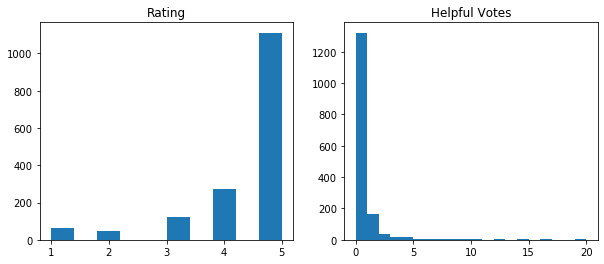

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [24]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
6378,0.923500,4,1,2,"It's worth the monthly fee! Considering the cost of a movie theater ticket, what a bargain! I can enjoy a movie without a considerable amount of commercials, if I am interruped, I can pause the movie and if I am hard of hearing, most movies have closed caption! I caneven make my own popcorn at home! I can also just stop the movie if it think it's something not of my liking, and start another!!I don't have to drive to and from the theater, no long lines, etc. and if you happen to own a large screen .......... what more could you ask for????????"
10664,0.918300,5,1,2,"Have had Amazon Prime for years so I didn't consider this at all. But with everyone we know raving about it, I thought we'd give it a try. And it does have so much more than Amazon Prime and it also seems to download faster than AP. I'm glad we got it...my only suggestion is to have an annual fee instead of the dreaded monthly debit from our credit card. That's a bit of a nusiciance, and if they had an annual sub they could probably give a bit of a price cut and everyone would be happier."
4608,0.897500,5,13,17,"Well worth it. 250 plus channels with my Dish service and most nights there is nothing but junk on television. Netflix saves the day. My wife loves the Asian movies and they have several TV series that I have never seen and you can watch one episode after another and all with no commercials.. Best money I spend all month. I have it on all the televisions, phones, computers and pads. It remembers what you were watching and you can pick up your show where you left off on any device you pick up. Great selection of everything and I highly recommend it to anyone tired of nothing on their dish or cable service."
11454,0.889500,3,0,1,"No to Netflix I received a gift card for Netflix and so far I would not spend my own money for it. I will use up the giftcard and then I think I would be better off with some other vendor, possible Amazon prime. The selection of movies is quite poor and the TV seasons for the shows offered are not the current seasons so you can watch the past seasons but if you don't have the TV access to the current shows, you just have to hope that eventually they will show up. This is not a good choice for an occasional user."
9869,0.887200,5,0,0,"I love Netflix, decided to become a subscriber after a ... I love Netflix, decided to become a subscriber after a theater wanted $ 14 to see a film. No way...now I can watch films, and mostly Documents at my ease, when I want to. Great invention."


### Topic 3. Service

In [25]:
df.loc[df.Dominant_Topic == 3.0, 'Keywords'].iloc[0]

'service, streaming, time, product, year, price, customer, movie, film, option'

In [26]:
tmp = df.loc[df.Dominant_Topic == 3.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 3 reviews are 54% as 5-star and 21% has helpful votes

In [27]:
sum(tmp.star_rating == 5) / len(tmp)

0.543800539083558

In [28]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.792453
1    0.121968
2    0.025606
Name: helpful_votes, dtype: float64

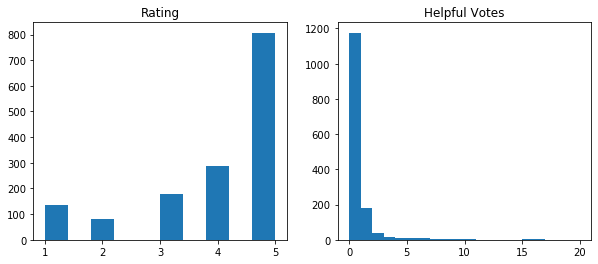

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [30]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
6386,0.943300,1,21,29,"Netflix and the Arrogant App The arrogance of this application is amazing. I am sure some ""team"" thought they new enough, did enough market research, etc. to believe the credits to a film don't matter. The ""team"" also apparently believes giving people fewer options is better because it's all just too advanced for us sheep to understand. I now have to scroll more, hit the back button more, use the navigation ring on Fire TV remote more, and I don't enjoy Netflix as much as I used to. Eventually there will be increasing options outside of Netflix and that will be a good thing. I'm thinking maybe I should try Amazon Prime. Although Amazon is getting arrogant too, at least the Prime service lets the movie play to the end without shrinking the credits into oblivion. I'll decide when to stop watching a movie Netflix, you don't need to prompt me."
6712,0.922800,5,5,6,Try it and odds are you will want to keep it! I absolutely love the selection that Netflix provides and also that everything that is offered is already included and paid for. For anyone who has not tried Netflix I recommend going into whatever store it is that you buy your dvd's and/or blue ray's from and making a list of movies and tv series that you would like to see and then trying Netflix's free month trial. Odds are that you will find many of the movies/series from your list on Netflix. I know that I did. The only down side (and it is not really a big one) is that the tv series are not current. You need to wait for what is playing on satellite/cable now. The plus side is that there is such a large selection to chose from and I found many other series to check out while waiting for the new episodes.
4299,0.903200,4,0,1,"The app itself deserves 5 stars, The company themselves, 3 or 4, I explain within. (yes I went there) I really am not a fan of Netflix. I appreciate their service to an extent but they made a mistake, and I'm admitting it was a mistake from the start, and charged me for two months for their service after I had cancelled. The app is great and definitely professionally done but my account was closed at the time and I couldn't access the service but they continued to charge me. I was very upset because it was during a time that I did not have sufficient funds in my account to cover all expenses. They get four stars as opposed to two or three however because they did refund my money promptly within two business days after I notified them of their mistake but I was highly disappointed. Tbh they deserve three stars from my response but I'm feeling generous atm."
10474,0.899200,3,1,1,Can you put in a request line and let customers list choices they would like to see become available Not enough movie choices . . . hard to believe I know but the last 3 titles I have been looking for to watch have not been listed. They were popular titles too. Can you put in a request line and let customers list choices they would like to see become available?
85,0.899000,2,0,2,too many problems thirty to forty percent of disks must be reabilitated by washing or other methods. Latest disk was cracked! Complaints are usually taken care of quickly but causing delays and notes from Netflix requiring status. Inertia carries us on.


### Topic 4. Trouble-shooting

In [31]:
df.loc[df.Dominant_Topic == 4.0, 'Keywords'].iloc[0]

'app, video, problem, issue, update, time, device, fire, work, fix'

In [32]:
tmp = df.loc[df.Dominant_Topic == 4.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 4 reviews are 20% as 1-star and 27% have helpful votes.

In [33]:
sum(tmp.star_rating == 1) / len(tmp)

0.20054945054945056

In [34]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.737912
1    0.117033
2    0.032967
Name: helpful_votes, dtype: float64

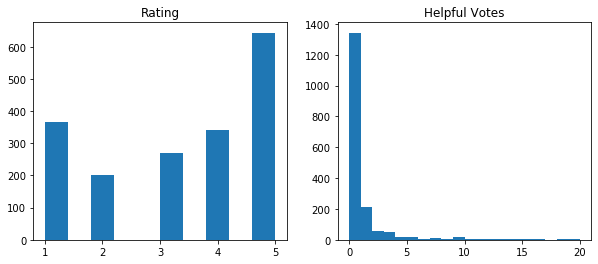

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [36]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
11845,0.934800,3,0,0,"good, browsing ui can be a bit too sluggish Streaming works fairly well. I've noticed that the browsing UI can be a bit sluggish. My guess is that some tasks are being handled in the UI thread, which should actually be delegated to a background thread (I'm a professional developer). This issue should be a high priority fix -- it really detracts from the experience of browsing the available movies and shows, when the Netfix app takes seconds to respond to a drag request. Also, this should have been caught during QA -- it's pretty basic and important stuff.."
2260,0.931900,3,1,2,"almost great Search is by title only, I often want to search by director or actor. Also the app locks up or goes to a black screen every once in awhile when starting. The only fix is to reboot the Kindle fire hd. When the connection is good the quality is great, when th connection is marginal it will sometimes go to a very low res image. This is just like the online version so that is a fyi not a knock on the app. If the fixed the search and stabalized the app a bit it would be five stars, but the search drives me crazy."
9186,0.927800,1,1,2,"Will not load movies on my Kindle Fire HD 8.9"" Netflix is a great service, and the app works wonderfully on my iPhone, but this app for the Kindle Fire HD doesn't work at all, as far as I'm concerned. I can sign in, but once I try to play something, I get the red Netflix ""Loading"" screen, and then nothing else happens. I've seen many other people post about this same issue, but the things they said would fix it have yet to work on mine. I've tried deleting it from the device and cloud and reinstalling, I've tried the hard reset, and I've even tried restoring the device to factory settings, all to no avail. I don't know where the fault lies, whether it's with the designers of the app, or with the designers of the Kindle, but there is clearly a problem here that needs to be addressed."
9955,0.910700,2,0,1,"video streaming quality is good, the rest is pretty bad Streaming quality is great. However, available movie selection is poor. The app has to be restarted fairly often because I get ""Could not load data"" or ""Error removing from List"" during movie title browsing; these errors only go away by restarting the app (or changing ""who is watching"" back and forth). The sound is hard to hear for many movies even at full volume (some movies are fine, though). There is also no adjustment of the brightness beyond the simple slider that the device provides -- a gamma adjustment would be nice as some movies are just too dark to see well even on the brightest setting. The controls (play, pause, fast forward) are pretty bad. There's only one quick rewind and it is 30 seconds, which is way too much, when you just want to go back because you missed something. Still, if you wanted to go back a minute, you can't use the quick rewind button twice, without waiting for the first rewind to fully rebuffer. There is no fast forward at all. Repositioning with the slider is cumbersome and error prone; you can't get it to a particular time value that you want. It is very easy to accidentally hit the position slider when you're trying to hit the quick rewind button, and if you do accidentally hit the slider, the moving starts over and you loose your place. Occasionally, I have to uninstall the app and re-download/re-install it because it just goes blank and no amount of ""force stop"" helps. Several other streaming technologies allow watching faster than real time (e.g. youtube and windows media player -- with these you can even get ok sound at 2x regular play speed), but not with this app; if I feel the movie or documentary is dragging on, I can still only watch it at regular speed."
1966,0.905300,3,3,4,"it worked great. The Fire TV box was purchased to replace ... This is for the Netflix Amazon Fire TV app: Took a couple of days of clicking on the a

### Topic 5. Shows

In [37]:
df.loc[df.Dominant_Topic == 5.0, 'Keywords'].iloc[0]

'love, movie, tv_show, season, lot, watch, tv, watch_movie, love_great, month'

In [38]:
tmp = df.loc[df.Dominant_Topic == 5.0,:].sort_values('Perc_Contribution', ascending=False).loc[:, ['Perc_Contribution', 'star_rating', 'helpful_votes', 'total_votes', 'review']]

Topic 5 reviews are 73% as 5-star and not helpful

In [39]:
sum(tmp.star_rating == 5) / len(tmp)

0.7262204328132864

In [40]:
(tmp.loc[:, 'helpful_votes'].value_counts() / len(tmp)).head(3)

0    0.868646
1    0.092602
2    0.010569
Name: helpful_votes, dtype: float64

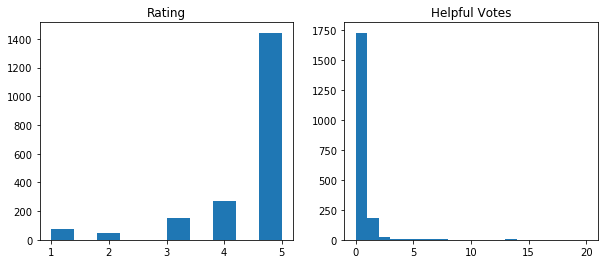

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(tmp.star_rating)
ax[1].hist(tmp.helpful_votes, bins = np.linspace(0, 20, 21))
ax[0].set_title('Rating'); ax[1].set_title('Helpful Votes');

In [42]:
tmp.head().style.set_properties(subset=['review'], **{'width': '800px'})

,Perc_Contribution,star_rating,helpful_votes,total_votes,review
9756,0.866700,5,0,0,Who really doesn't love netflix. It is everything in one place Who really doesn't love netflix. It is everything in one place. I mean they could have a few more things but if not there is project TV or hulu.
5452,0.865500,5,8,10,"Love It Netflix give us the freedom to see movies we would have missed; I have been a fan of Netflix since it first stared. Blockbusters made more money off us buy being late returning the movies. Then one Man stood up to Blockbusters and said no more, that was about the time DVDs came out. He had a great new way to view movies, by mailing them out to us, with no fine if they were not returned the next day.I just want to say thank you Netflix.Bruce"
772,0.852200,3,0,0,needs more current seasons Wish there were last seasons madmen and other more up to date seasons for certain shows. Had to get madmen season 6 on iTunes
1050,0.850900,5,0,0,movies Still need to watch a movie and learn how to use our television for what we download. Great tool and innovation.
6763,0.849100,4,0,0,I find there's not a great variety of full-length movies I find there's not a great variety of full-length movies. I going with the Hulu for the tv shows. Great if your into newer movies.
